In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
df = pd.read_csv("coffee_sales_data.csv")

# Просмотр первых строк
df.head()

,Дата,День недели,Количество Продаж,Тип Кофе,Цена за Чашку,Погодные Условия,Выходной
0,2024-01-01,Monday,197,Латте,131,Облачно,Нет
1,2024-01-02,Tuesday,58,Эспрессо,143,Облачно,Нет
2,2024-01-03,Wednesday,99,Эспрессо,192,Солнечно,Нет
3,2024-01-04,Thursday,196,Эспрессо,142,Дождь,Да
4,2024-01-05,Friday,132,Капучино,117,Солнечно,Да


In [11]:
#1 TASK
# Группировка по дню недели и подсчёт общей суммы продаж
sales_by_day = df.groupby('День недели')['Количество Продаж'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(sales_by_day)

День недели
Monday       6702
Tuesday      6345
Wednesday    6436
Thursday     6617
Friday       6369
Saturday     6787
Sunday       6695
Name: Количество Продаж, dtype: int64


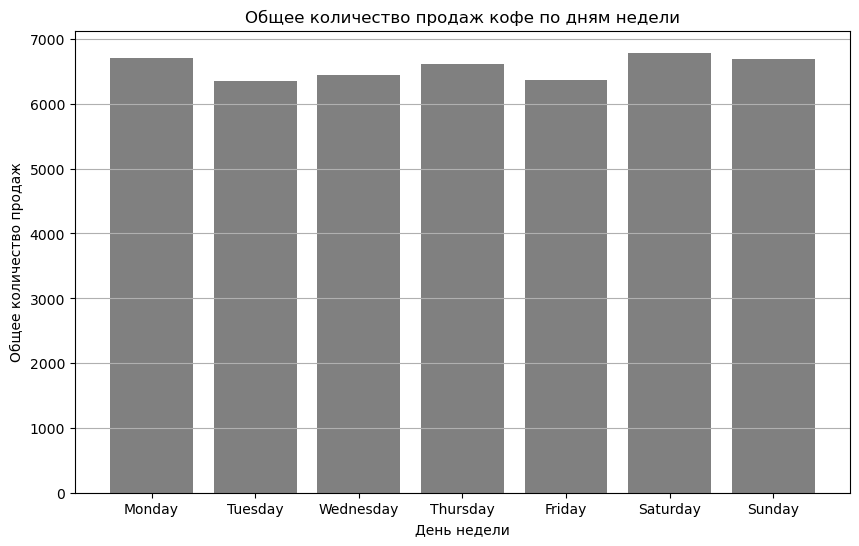

In [14]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(sales_by_day.index, sales_by_day.values, color='gray')

# Подписи и оформление
plt.title('Общее количество продаж кофе по дням недели')
plt.xlabel('День недели')
plt.ylabel('Общее количество продаж')
plt.grid(axis='y')

# Показ графика
plt.show()

In [15]:
#2 TASK
# Проверим, какие уникальные типы кофе есть
print(df['Тип Кофе'].unique())

['Латте' 'Эспрессо' 'Капучино']


In [17]:
# Фильтрация на нужные типы
selected_types = ['Эспрессо', 'Латте', 'Капучино']
filtered_df = df[df['Тип Кофе'].isin(selected_types)]

<Figure size 800x600 with 0 Axes>

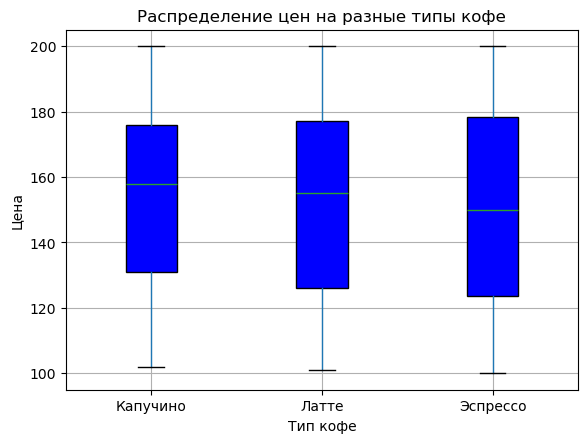

In [20]:
# Построение boxplot
plt.figure(figsize=(8, 6))
filtered_df.boxplot(column='Цена за Чашку', by='Тип Кофе', grid=True, patch_artist=True,
                    boxprops=dict(facecolor='blue'))

# Оформление
plt.title('Распределение цен на разные типы кофе')
# Убираем автоматический заголовок от pandas
plt.suptitle('')  
plt.xlabel('Тип кофе')
plt.ylabel('Цена')
plt.grid(True, axis='y')

# Показ графика
plt.show()

In [27]:
#3 TASK
# Отметим выходные и будни
df['День недели (б/в)'] = df['Выходной'].map({'Да': 'Выходной', 'Нет': 'Будний'})

In [28]:
# Суммарные продажи
sales = df.groupby('День недели (б/в)')['Количество Продаж'].sum()

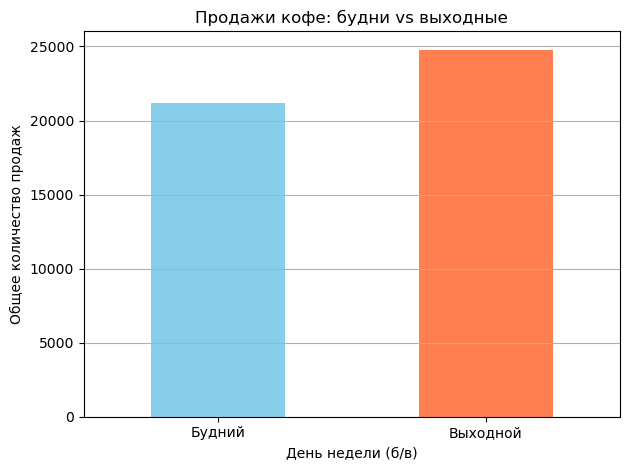

In [29]:
# Построение диаграммы
sales.plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Продажи кофе: будни vs выходные')
plt.ylabel('Общее количество продаж')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()